Data Cleaning Stage
Missing values per column:
Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

Missing values after cleaning:
Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

Number of duplicate rows: 12
Number of duplicate rows after cleaning: 0

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 49988 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         49988 non-null  object 
 1   Model                49988 non-null  object 
 2   Engine size          49988 non-null  float64
 3   Fuel type            49988 non-null  object 
 4   Year of manufacture  49988 non-null  int64  
 5   Mi

C:\Users\TEMP.ABDO\AppData\Local\Temp\ipykernel_11800\1791972968.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x=top_manufacturers.index, y=top_manufacturers.values, palette='Blues_r', order=top_manufacturers.index)
C:\Users\TEMP.ABDO\AppData\Local\Temp\ipykernel_11800\1791972968.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 1], x=avg_price_by_manufacturer.index, y=avg_price_by_manufacturer.values, palette='Blues_r', order=avg_price_by_manufacturer.index)


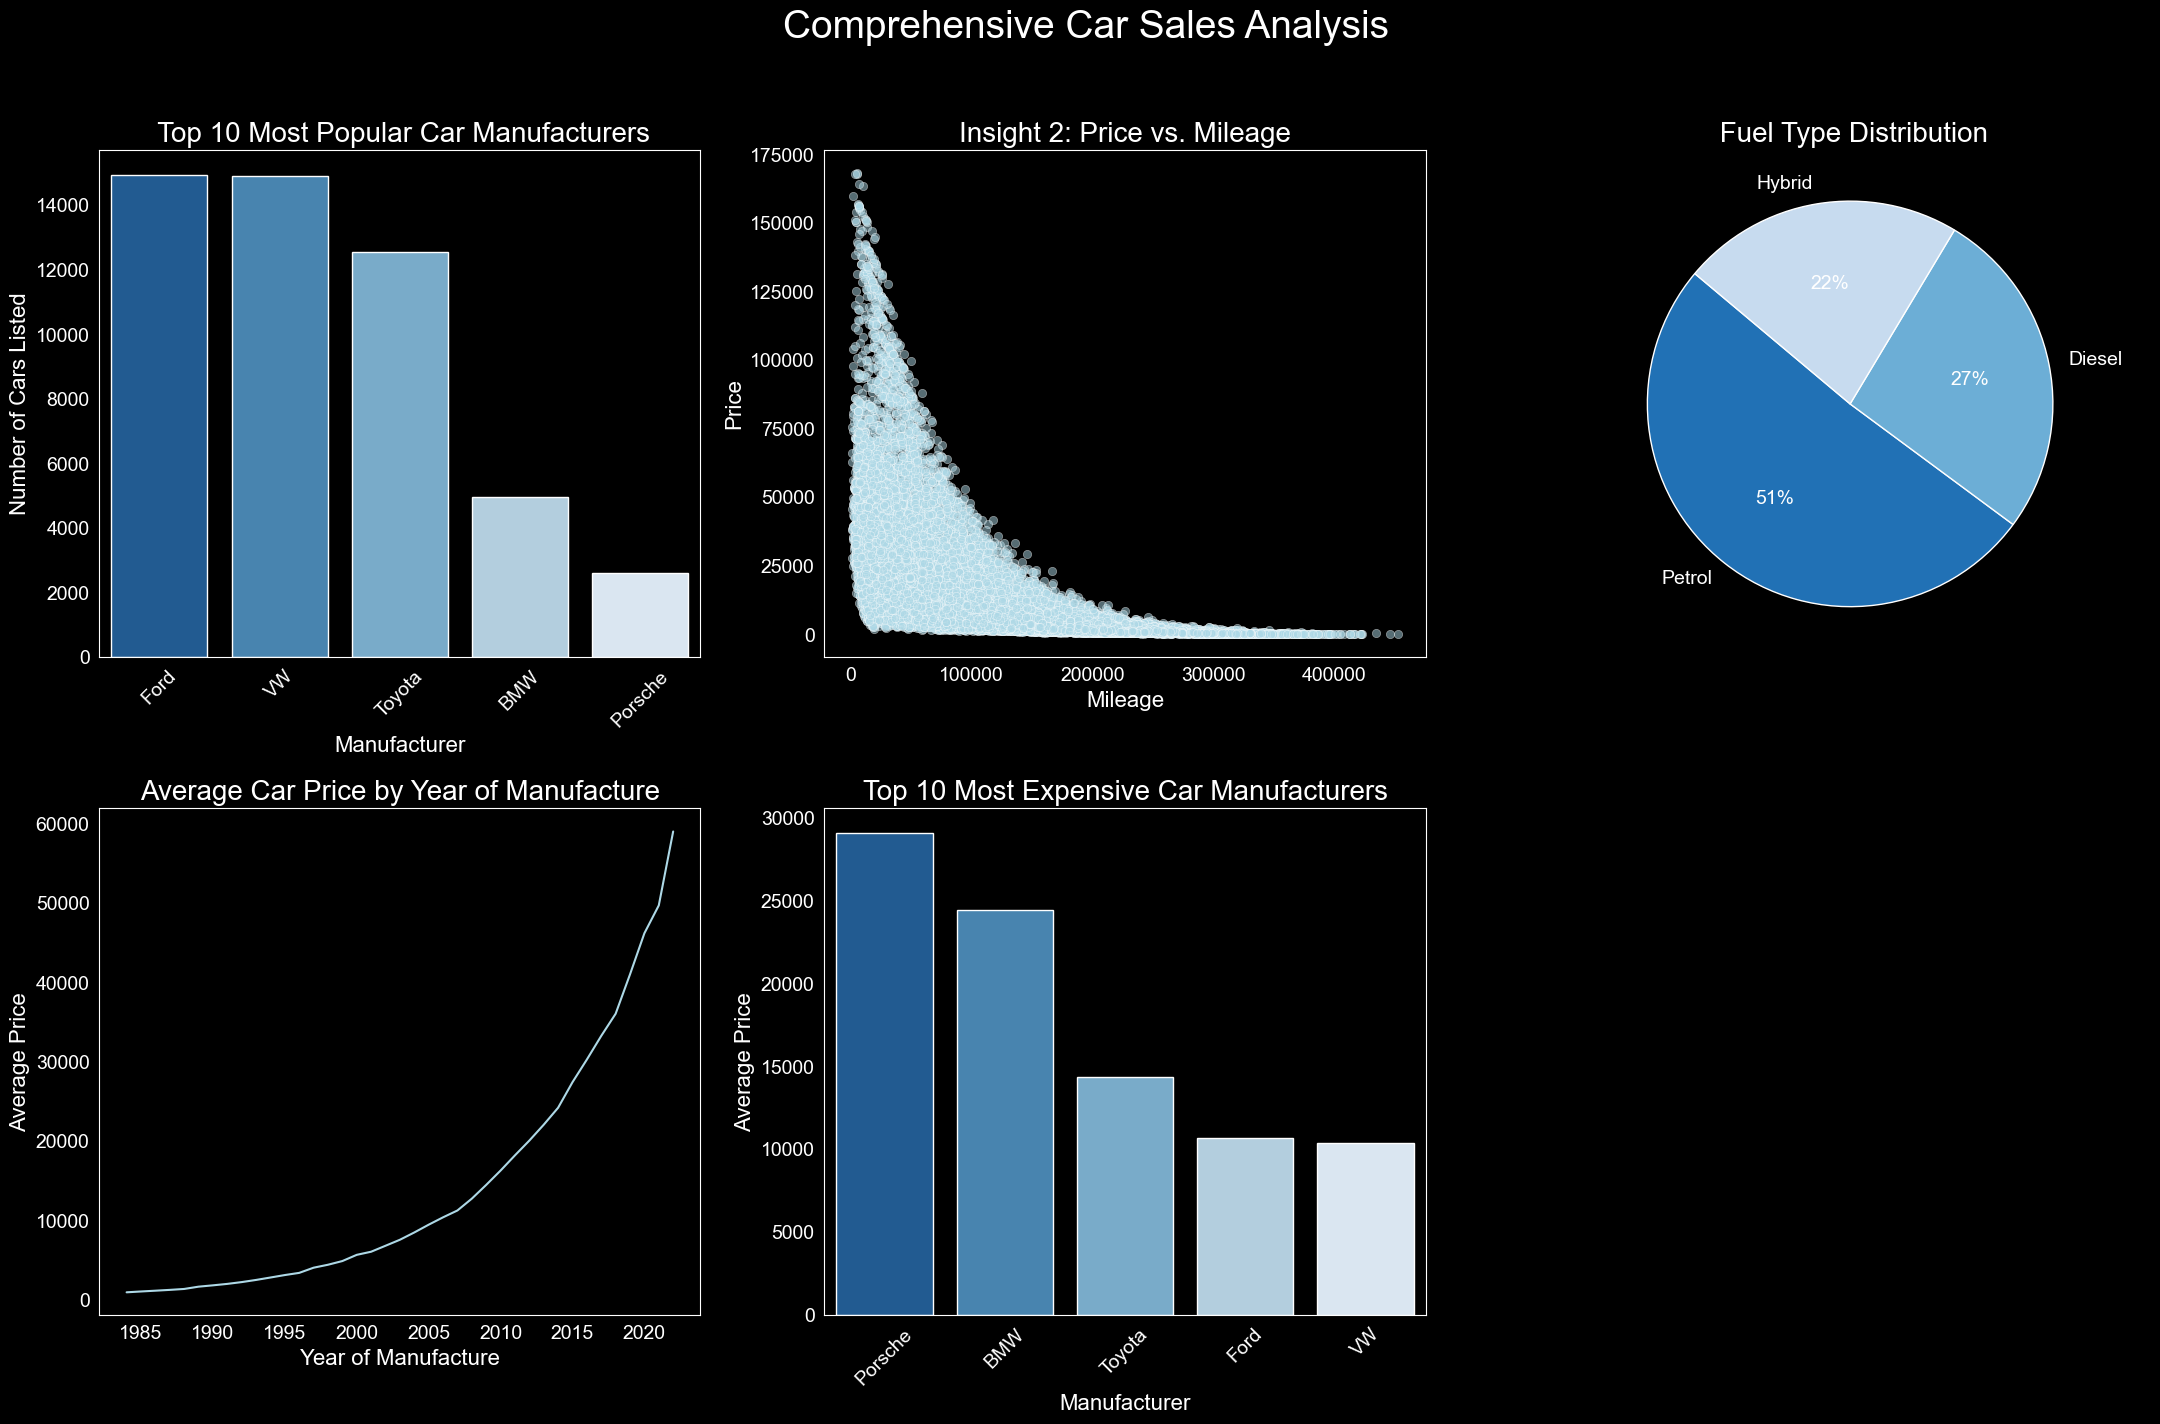


💡 **Insight 1:** The most popular car brands are revealed! This shows which manufacturers dominate the listings.

💡 **Insight 2:** As mileage goes up, price goes down. A classic rule of used cars, shown in a beautiful scatter plot.

💡 **Insight 3:** What's fueling the market? This pie chart breaks down the popularity of petrol, diesel, and hybrid cars.

💡 **Insight 4:** Newer cars cost more, but this chart shows just how much! We can see the price trends across different manufacturing years.

💡 **Insight 5:** Which brands have the highest price tags on average? This chart reveals the luxury leaders in the car market.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("dark")
plt.style.use("dark_background")

# Set global font size for clarity
plt.rcParams.update({'font.size': 16, 'axes.titlesize': 20, 'axes.labelsize': 16, 'xtick.labelsize': 14, 'ytick.labelsize': 14, 'legend.fontsize': 14})

df=pd.read_csv('car_sales_data.csv')

# Data Cleaning
print("Data Cleaning Stage")

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Handle missing values (if any) - for this example, let's fill with median for numerical and mode for categorical
for column in df.select_dtypes(include=np.number).columns:
    if df[column].isnull().any():
        df[column].fillna(df[column].median(), inplace=True)

for column in df.select_dtypes(include='object').columns:
    if df[column].isnull().any():
        df[column].fillna(df[column].mode()[0], inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after cleaning: {df.duplicated().sum()}")

# Display data types and info
print("\nData Info:")
df.info()

# --- Top 5 Insights ---

print("\n--- 💡 Top 5 Insights from the Car Sales Data 💡 ---")

# Create a figure and a set of subplots (2 rows x 3 columns for better spacing)
fig, axes = plt.subplots(2, 3, figsize=(22, 14))
fig.suptitle('Comprehensive Car Sales Analysis', fontsize=28, y=1.02)

# Insight 1: Most Popular Car Manufacturers
top_manufacturers = df['Manufacturer'].value_counts().head(10)
sns.barplot(ax=axes[0, 0], x=top_manufacturers.index, y=top_manufacturers.values, palette='Blues_r', order=top_manufacturers.index)
axes[0, 0].set_title(' Top 10 Most Popular Car Manufacturers', fontsize=20)
axes[0, 0].set_xlabel('Manufacturer', fontsize=16)
axes[0, 0].set_ylabel('Number of Cars Listed', fontsize=16)
axes[0, 0].tick_params(axis='x', rotation=45, labelsize=14)
axes[0, 0].tick_params(axis='y', labelsize=14)

# Insight 2: Relationship between Mileage and Price
sns.scatterplot(ax=axes[0, 1], data=df, x='Mileage', y='Price', alpha=0.5, color='lightblue')
axes[0, 1].set_title('Insight 2: Price vs. Mileage', fontsize=20)
axes[0, 1].set_xlabel('Mileage', fontsize=16)
axes[0, 1].set_ylabel('Price', fontsize=16)
axes[0, 1].tick_params(axis='x', labelsize=14)
axes[0, 1].tick_params(axis='y', labelsize=14)

# Insight 3: Distribution of Fuel Types
fuel_counts = df['Fuel type'].value_counts()
def percent_no_decimal(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return '{:.0f}%'.format(pct)
axes[0, 2].pie(fuel_counts, labels=fuel_counts.index, autopct=lambda pct: percent_no_decimal(pct, fuel_counts), startangle=140, colors=sns.color_palette('Blues_r', n_colors=len(fuel_counts)), textprops={'fontsize': 14})
axes[0, 2].set_title(' Fuel Type Distribution', fontsize=20)

# Insight 4: Trend of Car Prices by Year of Manufacture
avg_price_by_year = df.groupby('Year of manufacture')['Price'].mean().reset_index()
sns.lineplot(ax=axes[1, 0], data=avg_price_by_year, x='Year of manufacture', y='Price', color='lightblue')
axes[1, 0].set_title('Average Car Price by Year of Manufacture', fontsize=20)
axes[1, 0].set_xlabel('Year of Manufacture', fontsize=16)
axes[1, 0].set_ylabel('Average Price', fontsize=16)
axes[1, 0].tick_params(axis='x', labelsize=14)
axes[1, 0].tick_params(axis='y', labelsize=14)

# Insight 5: Average Price by Manufacturer
avg_price_by_manufacturer = df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False).head(10)
sns.barplot(ax=axes[1, 1], x=avg_price_by_manufacturer.index, y=avg_price_by_manufacturer.values, palette='Blues_r', order=avg_price_by_manufacturer.index)
axes[1, 1].set_title('Top 10 Most Expensive Car Manufacturers', fontsize=20)
axes[1, 1].set_xlabel('Manufacturer', fontsize=16)
axes[1, 1].set_ylabel('Average Price', fontsize=16)
axes[1, 1].tick_params(axis='x', rotation=45, labelsize=14)
axes[1, 1].tick_params(axis='y', labelsize=14)

# Remove the last empty subplot for a clean look
axes[1, 2].axis('off')

# Adjust layout and show the plot
plt.subplots_adjust(wspace=0.3, hspace=0.4, top=0.88)
plt.tight_layout()
plt.show()

# Print all insights after showing the chart
print("\n💡 **Insight 1:** The most popular car brands are revealed! This shows which manufacturers dominate the listings.")
print("\n💡 **Insight 2:** As mileage goes up, price goes down. A classic rule of used cars, shown in a beautiful scatter plot.")
print("\n💡 **Insight 3:** What's fueling the market? This pie chart breaks down the popularity of petrol, diesel, and hybrid cars.")
print("\n💡 **Insight 4:** Newer cars cost more, but this chart shows just how much! We can see the price trends across different manufacturing years.")
print("\n💡 **Insight 5:** Which brands have the highest price tags on average? This chart reveals the luxury leaders in the car market.")